In [ ]:
# Packages to load
import pandas as pd # data processing, CSV file
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file
data = pd.read_csv (r'C:\Users\sam\Documents\P1\amazon_mobile.csv')
print (data)

                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
print("Shape of the dataset: ", data.shape)
print(data.isnull().sum())

Shape of the dataset:  (413840, 6)
Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64


In [ ]:
# We can see that attribute Brand Name (65171), Price (5933) and Review Votes (12296) have considerable number of NULL values. But these attributes are not important for our objective.
# We have only 62 NULL values in Reviews attribute.So we will remove that 62 rows.

In [ ]:
#Counting numbers of reviews in each star rating
num_review = data.groupby('Rating')['Rating'].count()


# Convert the dictionary into DataFrame
df = pd.DataFrame(num_review)
df['Number of Reviews'] = num_review

# Declare a list that is to be converted into a column
percentage = num_review/413840*100

# Using 'Percentage' as the column name and equating it to the list
df['Percentage'] = percentage


# Observe the result
df

,Rating,Number of Reviews,Percentage
Rating,,,
1,72350,72350,17.482602
2,24728,24728,5.975256
3,31765,31765,7.675672
4,61392,61392,14.834719
5,223605,223605,54.031751


In [ ]:
data_unbalance = data.drop(['Product Name','Brand Name','Price','Review Votes'], axis=1)
data_unbalance.head(10)

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
5,1,I already had a phone with problems... I know ...
6,2,The charging port was loose. I got that solder...
7,2,"Phone looks good but wouldn't stay charged, ha..."
8,5,I originally was using the Samsung S2 Galaxy f...
9,3,It's battery life is great. It's very responsi...


In [ ]:
data_unbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Rating   413840 non-null  int64 
 1   Reviews  413778 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [ ]:
print("Shape of the dataset: ", data_unbalance.shape)
print(data_unbalance.isnull().sum())

Shape of the dataset:  (413840, 2)
Rating      0
Reviews    62
dtype: int64


In [ ]:
data_unbalance.dropna(inplace=True) # We are droping any rows with missing values or Null values.

In [ ]:
print("Shape of the dataset: ", data_unbalance.shape)
print(data_unbalance.isnull().sum())

Shape of the dataset:  (413778, 2)
Rating     0
Reviews    0
dtype: int64


In [ ]:
len(data_unbalance)

413778

In [ ]:
# Classsification of Review for Unbalanced Dataset Based on Star Rating @ AlQahtani
# Considering rating with 4 & 5 star as positive= +1, and 1 & 2 star as negative reviews = 0, and droping 3 star rating (neutral)

data_unbalance=data_unbalance[data_unbalance.Rating!=3]   # to drop reviews of rating 3
data_unbalance['Unbalance Dataset Label'] = np.where(data_unbalance['Rating']>2, 1, 0)
data_unbalance.head(10)

,Rating,Reviews,Unbalance Dataset Label
0,5,I feel so LUCKY to have found this used (phone...,1
1,4,"nice phone, nice up grade from my pantach revu...",1
2,5,Very pleased,1
3,4,It works good but it goes slow sometimes but i...,1
4,4,Great phone to replace my lost phone. The only...,1
5,1,I already had a phone with problems... I know ...,0
6,2,The charging port was loose. I got that solder...,0
7,2,"Phone looks good but wouldn't stay charged, ha...",0
8,5,I originally was using the Samsung S2 Galaxy f...,1
11,5,This is a great product it came after two days...,1


In [ ]:
#data_unbalance.to_csv('to_check_drop_3.csv')

In [ ]:
len(data_unbalance)   #removed 62 review + 31765 3 star reviews

382015

In [ ]:
len(data)

413840

In [ ]:
#Counting numbers of reviews in each star rating
num_review1 = data_unbalance.groupby('Rating')['Rating'].count()


# Convert the dictionary into DataFrame
df1 = pd.DataFrame(num_review1)
df1['Number of Reviews'] = num_review1

# Declare a list that is to be converted into a column
percentage1 = num_review1/382015*100

# Using 'Percentage' as the column name and equating it to the list
df1['Percentage'] = percentage1


# Observe the result
df1

,Rating,Number of Reviews,Percentage
Rating,,,
1,72337,72337,18.935644
2,24724,24724,6.471997
4,61374,61374,16.065861
5,223580,223580,58.526498


In [ ]:
# Counting numbers of Positive and Negative reviews in Unbalance Dataset
num_un_pn = data_unbalance.groupby('Unbalance Dataset Label')['Unbalance Dataset Label'].count()


# Convert the dictionary into DataFrame
df2 = pd.DataFrame(num_un_pn)
df2['Number of Reviews'] = num_un_pn

# Declare a list that is to be converted into a column
percentage2 = num_un_pn/382015*100

# Using 'Percentage' as the column name and equating it to the list
df2['Percentage of Reviews'] = percentage2


# Observe the result
df2

,Unbalance Dataset Label,Number of Reviews,Percentage of Reviews
Unbalance Dataset Label,,,
0,97061,97061,25.407641
1,284954,284954,74.592359


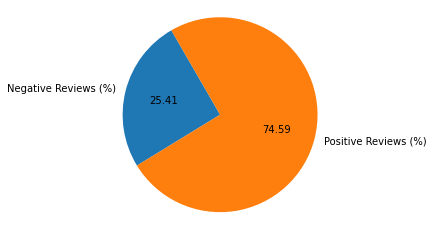

In [ ]:
# import the pyplot library
import matplotlib.pyplot as plotter
# The slice names of a population distribution pie chart

pieLabels              = 'Negative Reviews (%)', 'Positive Reviews (%)'

# Review  data

reviewcount     = [97061, 284954]

figureObject, axesObject = plotter.subplots()

# Draw the pie chart

axesObject.pie(reviewcount,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=120)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plotter.show()

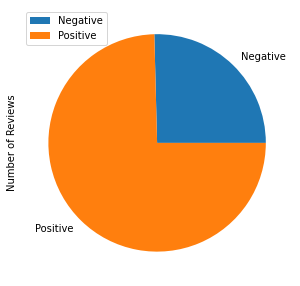

In [ ]:
# Plot for Types of Reviews in unbalance dataset
df1 = pd.DataFrame({'Number of Reviews': [97061, 284954],
                   'Type': [0, 1]},
                  index=['Negative', 'Positive'])
plot = df1.plot.pie(y='Number of Reviews', figsize=(5, 5))

In [ ]:
data_unbalance.head(10)

,Rating,Reviews,Unbalance Dataset Label
0,5,I feel so LUCKY to have found this used (phone...,1
1,4,"nice phone, nice up grade from my pantach revu...",1
2,5,Very pleased,1
3,4,It works good but it goes slow sometimes but i...,1
4,4,Great phone to replace my lost phone. The only...,1
5,1,I already had a phone with problems... I know ...,0
6,2,The charging port was loose. I got that solder...,0
7,2,"Phone looks good but wouldn't stay charged, ha...",0
8,5,I originally was using the Samsung S2 Galaxy f...,1
11,5,This is a great product it came after two days...,1


In [ ]:
#data_unbalance.to_csv('amazon_labeldata_drop_3.csv')